In [1]:
# import lib
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('INTC', data_source='yahoo',  start="2018-11-01", end="2020-11-30")
df.reset_index(drop=False, inplace=True)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,High,Low,Open,Close,Volume,Adj Close
2018-11-01,2018-11-01,48.470001,46.860001,46.950001,48.220001,28335300.0,45.342548
2018-11-02,2018-11-02,48.250000,46.750000,48.130001,47.110001,30759800.0,44.298786
2018-11-05,2018-11-05,48.250000,46.919998,47.340000,47.970001,23751200.0,45.107471
2018-11-06,2018-11-06,47.919998,47.029999,47.799999,47.250000,23839600.0,44.710045
2018-11-07,2018-11-07,48.750000,47.590000,47.630001,48.720001,29913200.0,46.101021
...,...,...,...,...,...,...,...
2020-11-23,2020-11-23,46.209999,45.450001,45.480000,46.060001,35489600.0,45.782108
2020-11-24,2020-11-24,47.299999,46.009998,46.290001,47.009998,33901200.0,46.726372
2020-11-25,2020-11-25,47.180000,46.570000,47.029999,47.049999,28126900.0,46.766132
2020-11-27,2020-11-27,48.099998,47.360001,47.360001,47.450001,15921400.0,47.163719


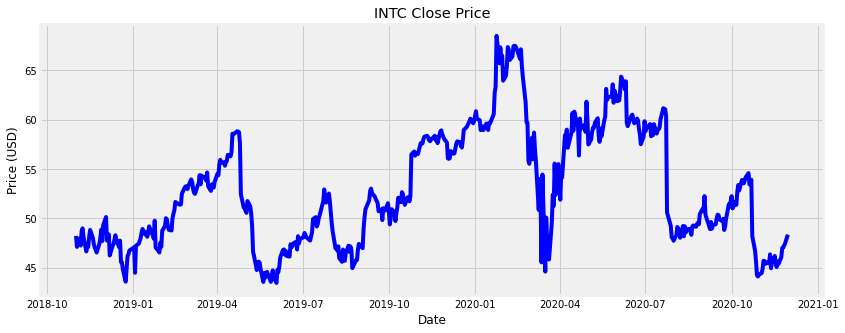

In [4]:
#Plot the Close price
plt.figure(figsize=(12.5, 5))
plt.plot(df.Close, color = 'blue')
plt.title('INTC Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [5]:
#Calculate the Fibonacci Level Prices with non-Fibonacci Level/Ratio of 0.5
#The Fibonacci Ratios are 0.236, 0.382, 0.618

#First get the maximum and minimum close price for time period

maximum_price = df['Close'].max()
minimum_price = df['Close'].min()

difference = maximum_price - minimum_price
first_level = maximum_price - difference * 0.236
second_level = maximum_price - difference * 0.382
third_level = maximum_price - difference * 0.5
fourth_level = maximum_price - difference * 0.618

In [6]:
#print the price of each level
print("Level Precentage Price ($)")
print('00.0%\t\t', maximum_price)
print('23.6%\t\t', first_level)
print('38.2%\t\t', second_level)
print('50.0%\t\t', third_level)
print('61.8%\t\t', fourth_level)
print('100.0%\t\t', minimum_price)

Level Precentage Price ($)
00.0%		 68.47000122070312
23.6%		 62.56764071655273
38.2%		 58.91618040466309
50.0%		 55.96500015258789
61.8%		 53.01381990051269
100.0%		 43.459999084472656


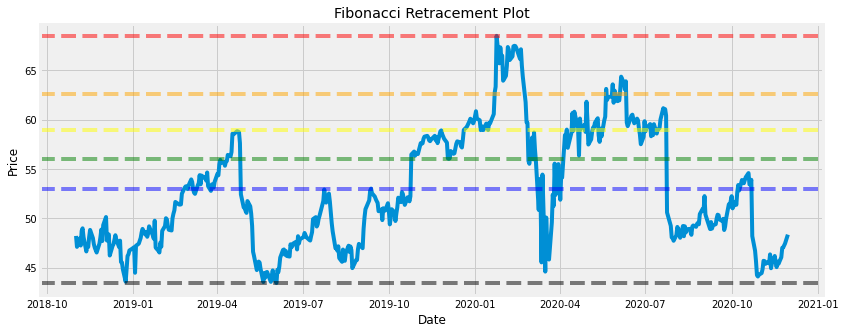

In [7]:
new_df = df
plt.figure(figsize=(12.5, 5))
plt.title('Fibonacci Retracement Plot')
plt.plot(new_df.index, new_df['Close'])
plt.axhline(maximum_price, linestyle='--',alpha=0.5, color='red')
plt.axhline(first_level, linestyle='--',alpha=0.5, color='orange')
plt.axhline(second_level, linestyle='--',alpha=0.5, color='yellow')
plt.axhline(third_level, linestyle='--',alpha=0.5, color='green')
plt.axhline(fourth_level, linestyle='--',alpha=0.5, color='blue')
plt.axhline(minimum_price, linestyle='--',alpha=0.5, color='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()